In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
import plotly.express as px
import scipy.stats as stats

In [3]:
data=pd.read_excel(r"C:\Users\mohil\Downloads/Bank_Personal_Loan_Modelling.xlsx",1)

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
data.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [8]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [11]:
fig=px.box(data,y=['Age','Experience', 'Income', 'Family','Education'],title="Five-point summary of Age, Experience, Income, Family, Education ")
fig.show()

In [12]:
data.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [ ]:
#When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
#When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

#conclusion: large number of positive outliers in income and less number of low outliers in experience

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

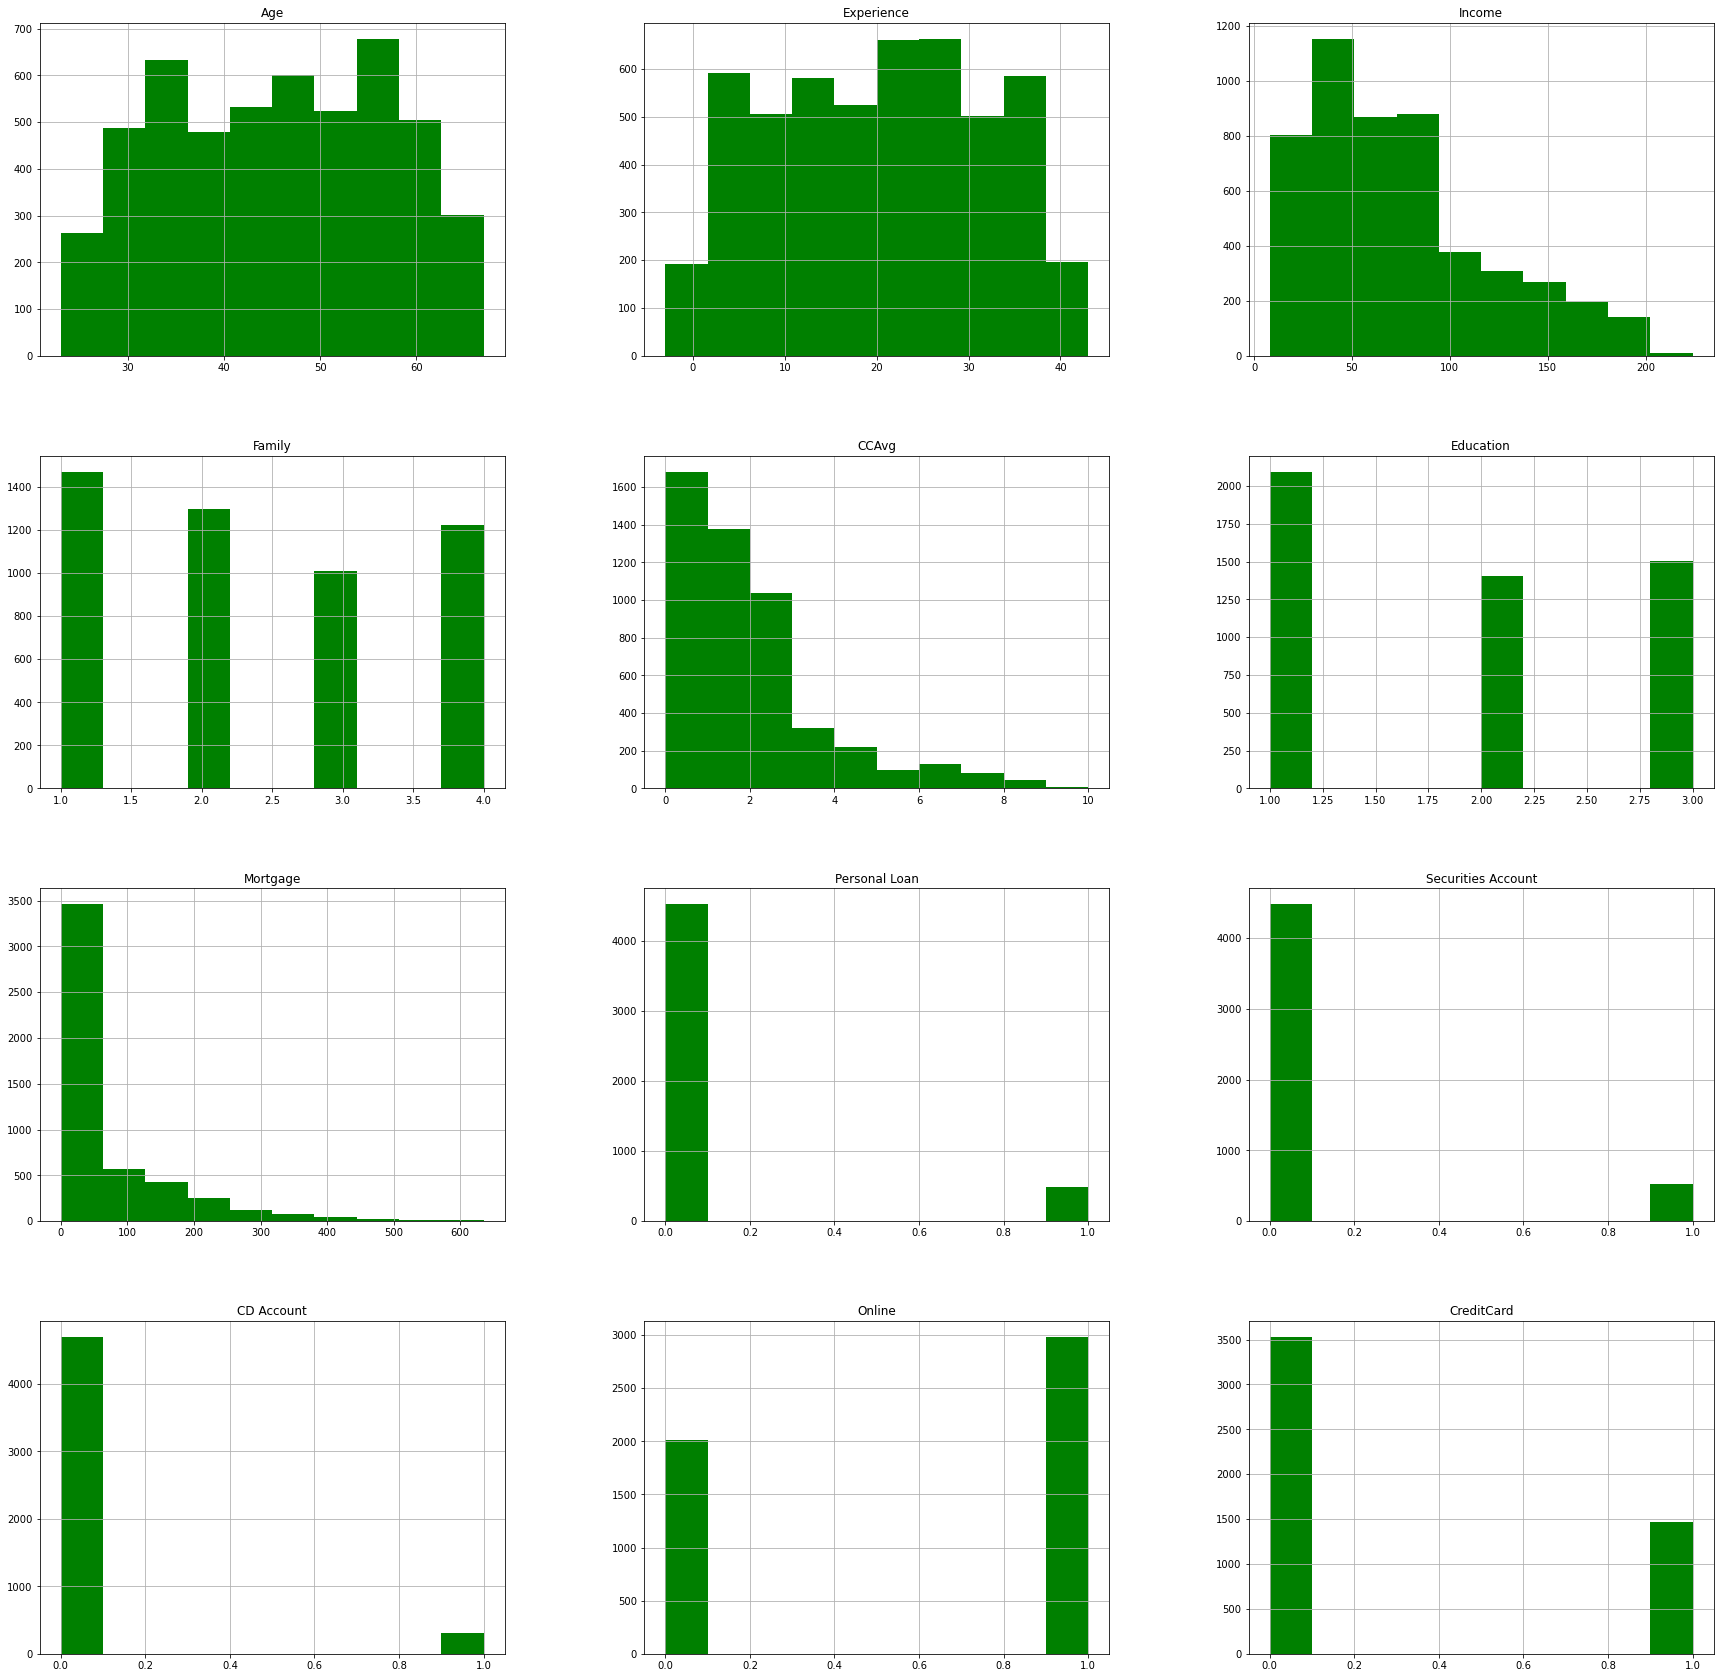

In [23]:
data.hist(figsize=(30,30),color="green")

D:\Software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Experience', ylabel='Density'>

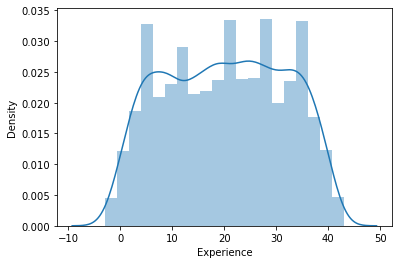

In [24]:
sb.distplot(data['Experience'])

In [ ]:
## here we can see some negative values

In [29]:
# storing negative values in a different database
Negative_values= data[data['Experience']<0]
Negative_values.size

624

D:\Software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

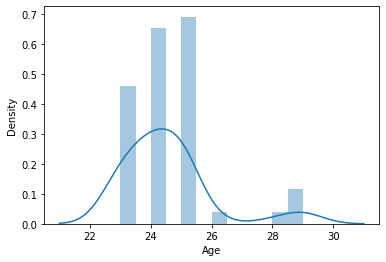

In [31]:
sb.distplot(Negative_values['Age'])

In [32]:
Negative_values['Experience'].mean()

-1.4423076923076923

In [37]:
print("Number of negative records:",((Negative_values.size/data.size)*100),"%")

Number of negative records: 1.04 %


In [38]:
### REPLACING Negative values with mean of Experience

In [42]:
dt=data.copy()
dt.shape

(5000, 12)

In [120]:
dt['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [121]:
dt

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,0,1,0
4996,30,4.0,15,4,0.4,1,85,0,0,0,1,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,0,1,0


In [122]:
print(data[data['Experience']<0])

      Age  Experience  Income  Family     CCAvg  Education  Mortgage  \
89     25          -1     113       4  2.300000          3         0   
226    24          -1      39       2  1.700000          2         0   
315    24          -2      51       3  0.300000          3         0   
451    28          -2      48       2  1.750000          3        89   
524    24          -1      75       4  0.200000          1         0   
536    25          -1      43       3  2.400000          2       176   
540    25          -1     109       4  2.300000          3       314   
576    25          -1      48       3  0.300000          3         0   
583    24          -1      38       2  1.700000          2         0   
597    24          -2     125       2  7.200000          1         0   
649    25          -1      82       4  2.100000          3         0   
670    23          -1      61       4  2.600000          1       239   
686    24          -1      38       4  0.600000          2      

In [123]:
print(data.iloc[89,:])

Age                    25.0
Experience             -1.0
Income                113.0
Family                  4.0
CCAvg                   2.3
Education               3.0
Mortgage                0.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  0.0
CreditCard              1.0
Name: 89, dtype: float64


In [125]:
print(dt.iloc[89,:])

#updated


Age                    25.0000
Experience             20.1046
Income                113.0000
Family                  4.0000
CCAvg                   2.3000
Education               3.0000
Mortgage                0.0000
Personal Loan           0.0000
Securities Account      0.0000
CD Account              0.0000
Online                  0.0000
CreditCard              1.0000
Name: 89, dtype: float64


In [126]:
dt[dt['CreditCard']==1].shape[0]

1470

In [127]:
# % of credit cards issued
print((dt[dt['CreditCard']==1].shape[0]/dt['CreditCard'].shape[0])*100,"%")

29.4 %


In [128]:
dt[dt['Personal Loan']==1].shape[0]

480

In [129]:
# % of Personal Loans issued
print((dt[dt['Personal Loan']==1].shape[0]/dt['Personal Loan'].shape[0])*100,"%")

9.6 %


In [130]:
dt[dt['CD Account']==1].shape[0]

302

In [131]:
# % of CD Accounts issued
print((dt[dt['CD Account']==1].shape[0]/dt['CD Account'].shape[0])*100,"%")

6.04 %


In [132]:
dt[dt['Securities Account']==1].shape[0]

522

In [133]:
# % of Security Accounts issued
print((dt[dt['Securities Account']==1].shape[0]/dt['Securities Account'].shape[0])*100,"%")

10.440000000000001 %


In [134]:
dt[dt['Online']==1].shape[0]

2984

In [135]:
# % of Users Online
print((dt[dt['Online']==1].shape[0]/dt['Online'].shape[0])*100,"%")

59.68 %


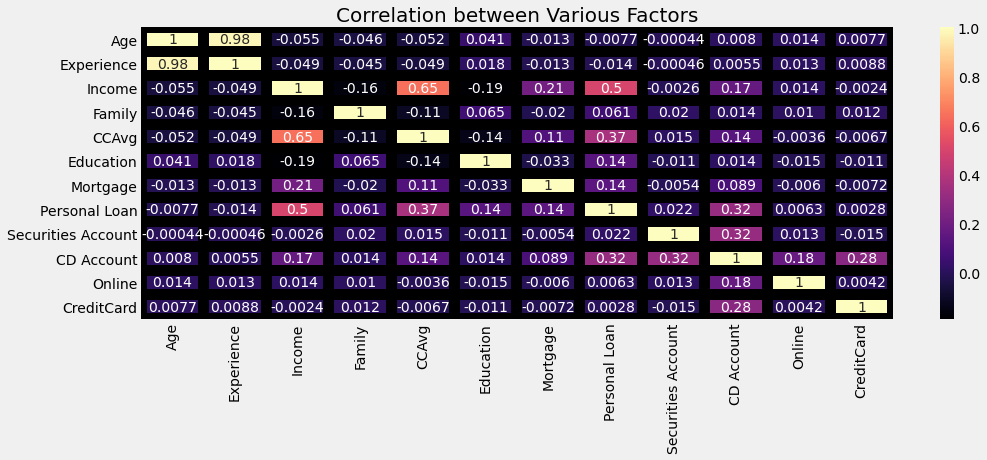

In [136]:
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')

sb.heatmap(dt[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']].corr(),
           cmap='magma',
           annot=True,linecolor='black',linewidths=10)
plt.title("Correlation between Various Factors", fontsize=20)
plt.show()


In [138]:
dt.drop(['Experience'],axis=1,inplace=True) 
#because age and experience are highly correlated

In [139]:
dt.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [140]:
dt['Education'].unique()

array([1, 2, 3], dtype=int64)

In [147]:
dict={1:"Undergraduate",2:"Graduate",3:"Professionals"}
dt['Edu_status']=dt['Education'].map(dict)

In [148]:
dt

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_status
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0,Professionals
4996,30,15,4,0.4,1,85,0,0,0,1,0,Undergraduate
4997,63,24,2,0.3,3,0,0,0,0,0,0,Professionals
4998,65,49,3,0.5,2,0,0,0,0,1,0,Graduate


In [149]:
# grouping education status column on the basis of age to create a pie chart
ed=dt.groupby('Edu_status')['Age'].count()

In [151]:
px.pie(dt,values=ed,names=ed.index,title="Education")

In [152]:
dt.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_status'],
      dtype='object')

In [156]:
def Account_Status(row):
    if(row['Securities Account']==1) & (row['CD Account']==1):
        return "Customer Holding Securities & Deposits"
    elif(row['Securities Account']==0) & (row['CD Account']==0):
        return "Customer Holding neither Securities nor Deposits"
    elif(row['Securities Account']==0) & (row['CD Account']==1):
        return "Customer Holding only Securities"
    else:
        return "Customer Holding only Deposits"

In [158]:
dt['Account_status']=dt.apply(Account_Status,axis=1)

In [159]:
dt

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_status,Account_status
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate,Customer Holding only Deposits
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate,Customer Holding only Deposits
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate,Customer Holding neither Securities nor Deposits
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Customer Holding neither Securities nor Deposits
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Customer Holding neither Securities nor Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0,Professionals,Customer Holding neither Securities nor Deposits
4996,30,15,4,0.4,1,85,0,0,0,1,0,Undergraduate,Customer Holding neither Securities nor Deposits
4997,63,24,2,0.3,3,0,0,0,0,0,0,Professionals,Customer Holding neither Securities nor Deposits
4998,65,49,3,0.5,2,0,0,0,0,1,0,Graduate,Customer Holding neither Securities nor Deposits


In [163]:
value=dt['Account_status'].value_counts()
px.pie(dt,values=value,names=value.index,title="Account Holder Information")

In [164]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [167]:
px.box(dt,x='Education',y='Income',facet_col='Personal Loan')

D:\Software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

D:\Software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



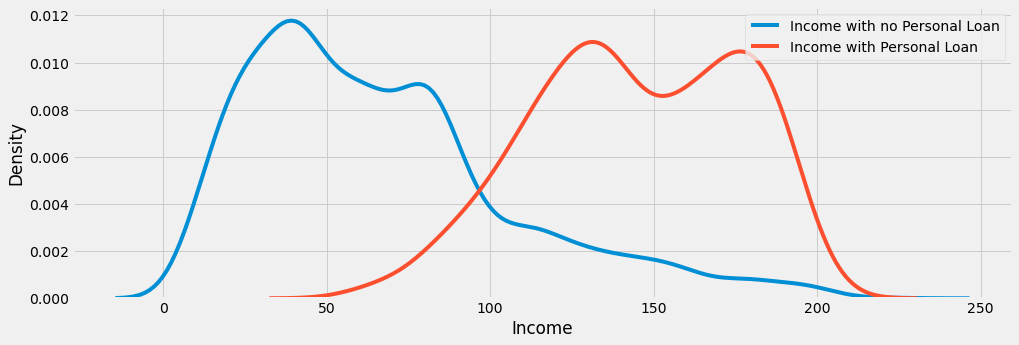

In [172]:
sb.distplot(dt[dt['Personal Loan']==0]['Income'],hist=False,label="Income with no Personal Loan")
sb.distplot(dt[dt['Personal Loan']==1]['Income'],hist=False,label="Income with Personal Loan")
plt.legend()

D:\Software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

D:\Software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



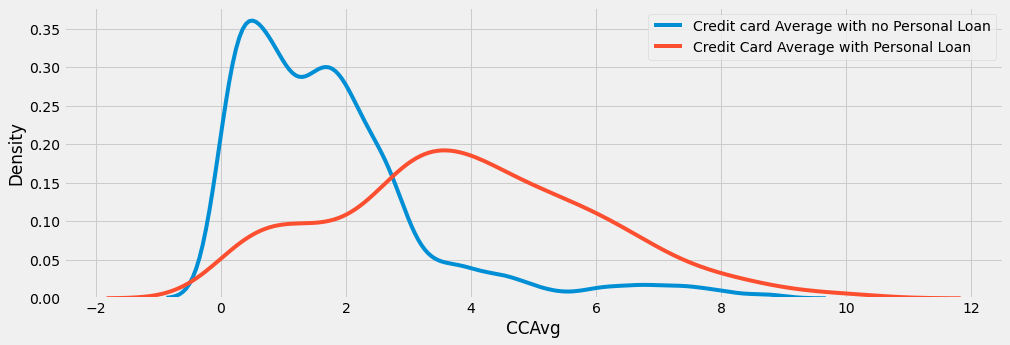

In [173]:
sb.distplot(dt[dt['Personal Loan']==0]['CCAvg'],hist=False,label="Credit card Average with no Personal Loan")
sb.distplot(dt[dt['Personal Loan']==1]['CCAvg'],hist=False,label="Credit Card Average with Personal Loan")
plt.legend()

D:\Software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

D:\Software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



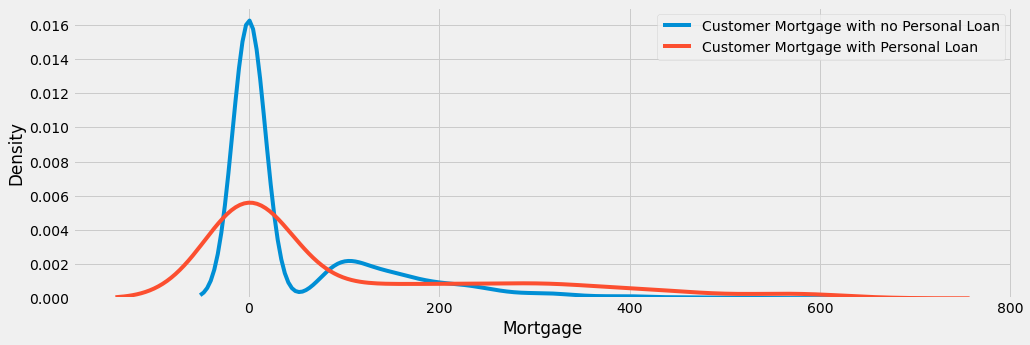

In [174]:
sb.distplot(dt[dt['Personal Loan']==0]['Mortgage'],hist=False,label="Customer Mortgage with no Personal Loan")
sb.distplot(dt[dt['Personal Loan']==1]['Mortgage'],hist=False,label="Customer Mortgage with Personal Loan")
plt.legend()

In [184]:
col_names=['Securities Account','Account_status','Online','CreditCard','Education']

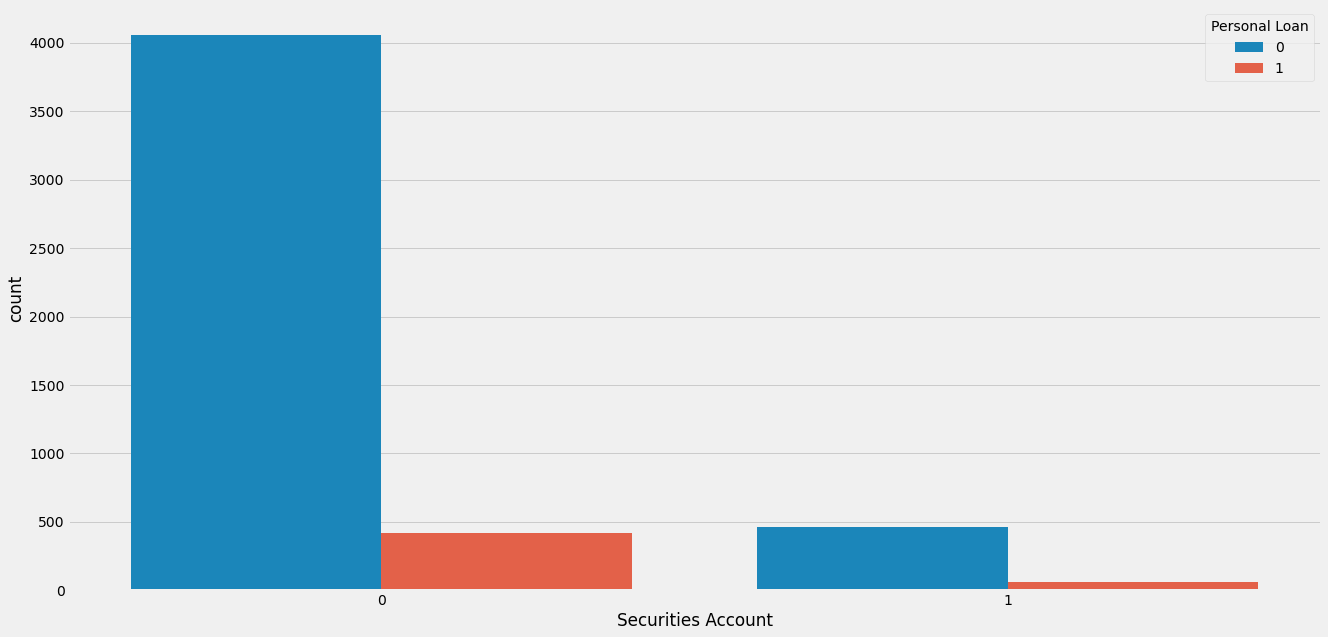

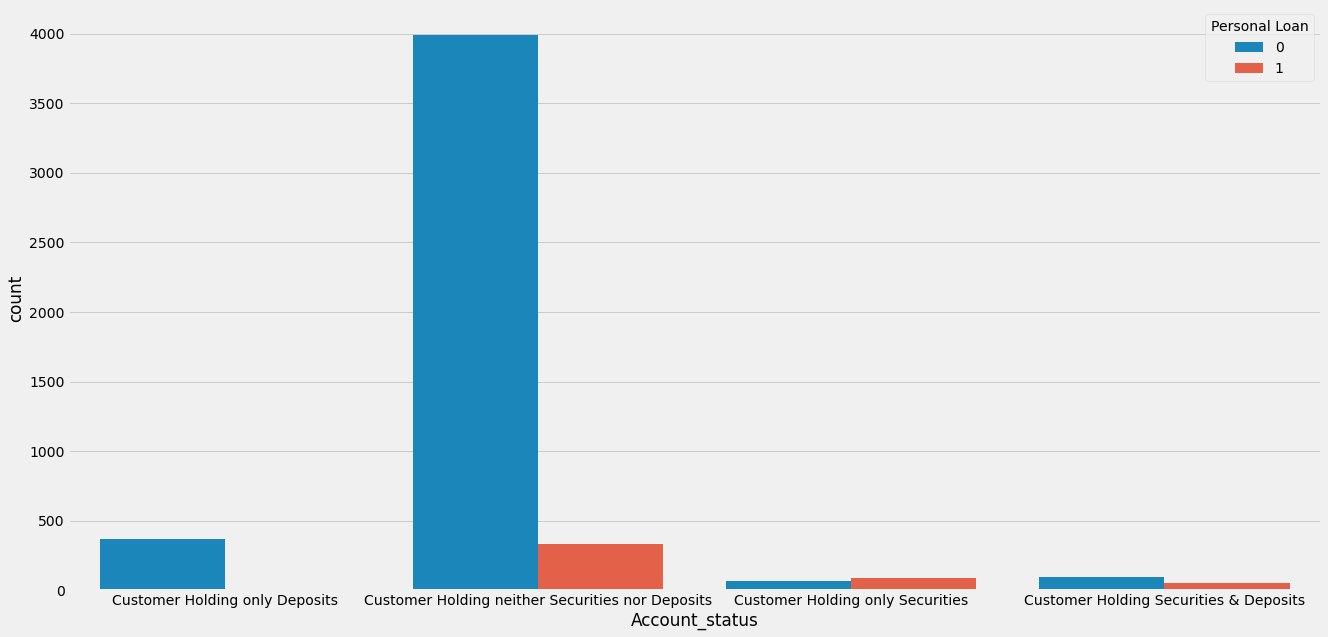

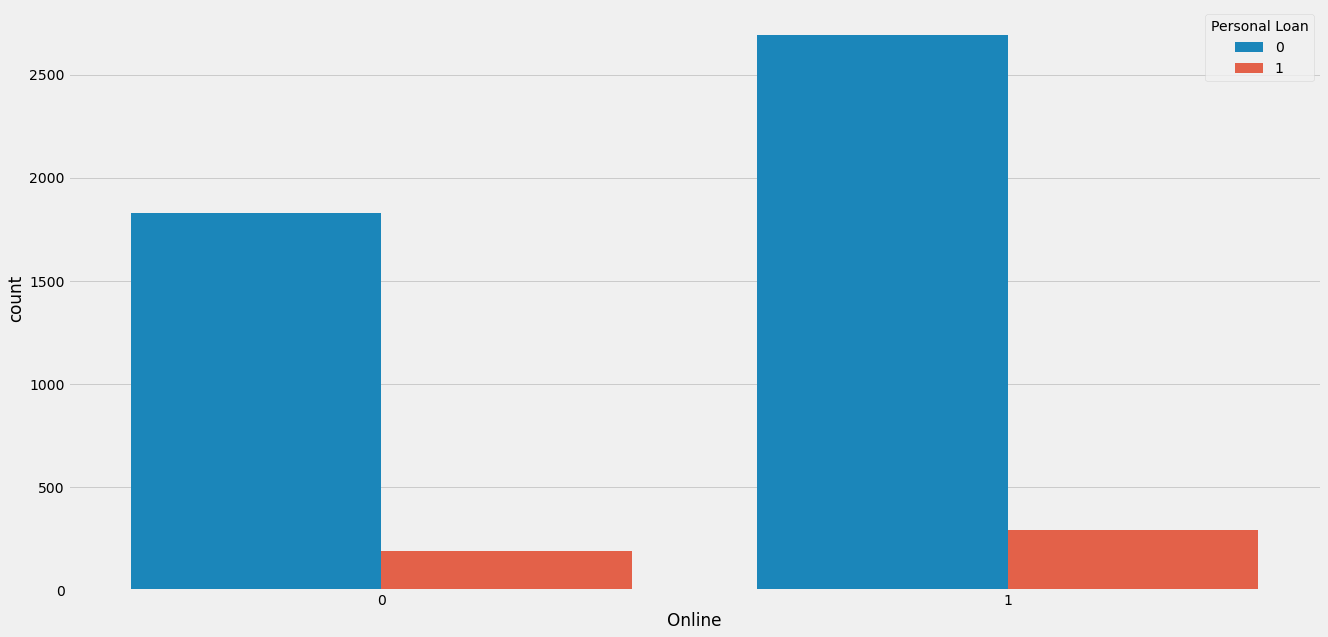

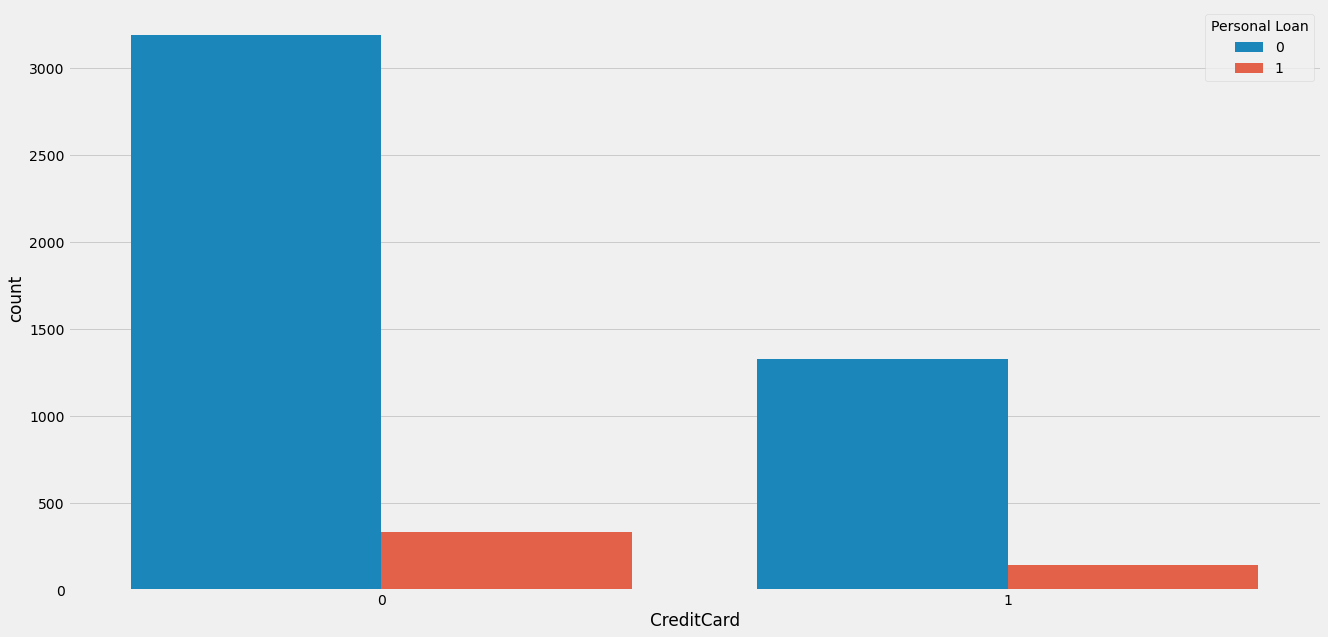

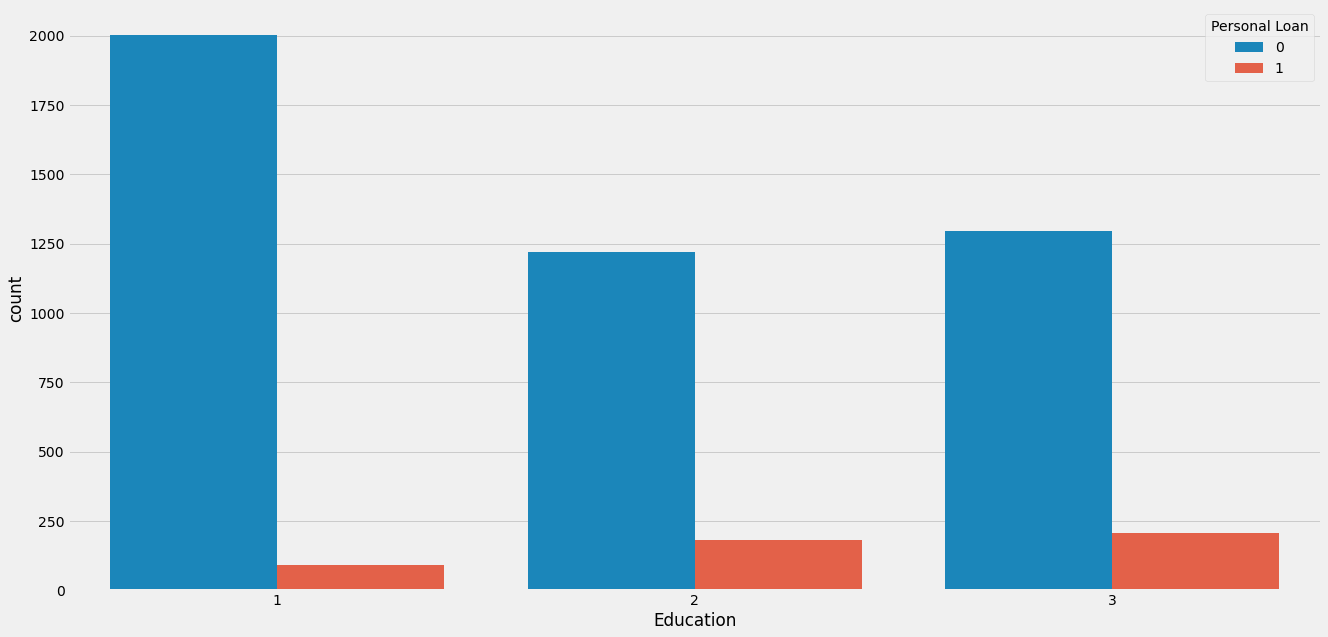

In [185]:
for i in col_names:
    plt.figure(figsize=(20,10))
    sb.countplot(x=i,hue='Personal Loan',data=dt)
    

D:\Software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

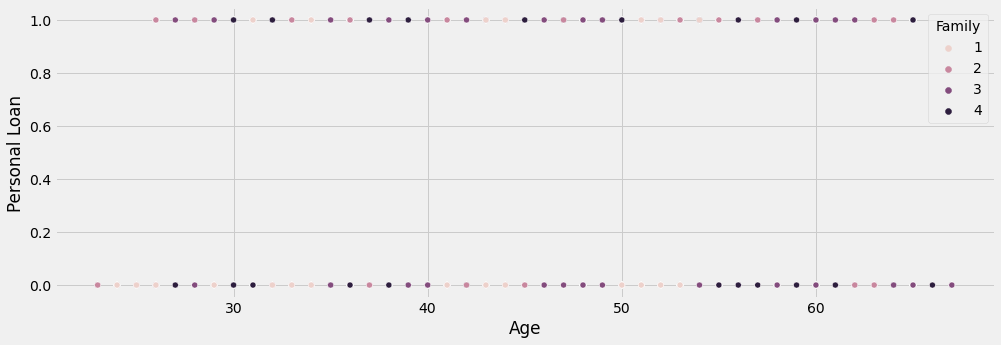

In [186]:
sb.scatterplot(dt['Age'],dt['Personal Loan'],hue=dt['Family'])

In [228]:
Hn ="Age of customers do not have any impact on Personal Loans"
H ="Age of customers have impact on Personal Loans"

In [229]:
age_no=np.array(dt[dt['Personal Loan']==0]['Age'])
age_yes=np.array(dt[dt['Personal Loan']==1]['Age'])

In [230]:
t,p_value=stats.ttest_ind(age_no,age_yes,axis=0)
if(p_value<0.05):
    print(H,"as p value is less than 0.05, p value = ", p_value)
else:
    print(Hn,"as p value is greator than 0.05, p value =",p_value)

Age of customers do not have any impact on Personal Loans as p value is greator than 0.05, p value = 0.584959263705325


In [236]:
def Hypothesis(col1,col2,Hn,H):
    arr1=np.array(dt[dt[col1]==0][col2])
    arr2=np.array(dt[dt[col1]==1][col2])
    t,p_value=stats.ttest_ind(arr1,arr2,axis=0)
    if(p_value<0.05):
        print(H,"as p value is less than 0.05, p value = ", p_value)
    else:
        print(Hn,"as p value is greator than 0.05, p value =",p_value)

In [237]:
Hypothesis('Personal Loan','Income',Hn="Income of customers do not have any impact on Personal Loans",H="Income of customers do have impact on Personal Loans")

Income of customers do have impact on Personal Loans as p value is less than 0.05, p value =  0.0


In [238]:
Hypothesis('Personal Loan','Family',Hn="Family of customers do not have any impact on Personal Loans",H="Family of customers do have impact on Personal Loans")

Family of customers do have impact on Personal Loans as p value is less than 0.05, p value =  1.4099040685673807e-05


In [242]:
data2=pd.read_csv(r"C:\Users\mohil\Downloads\Cost-of-Living-Analyzer (1)/cost-of-living.csv")

In [243]:
data2

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,...,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,...,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.00,1.69,1.02,0.84,...,1.50,1.10,2.37,4.00,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.00,2.82,1.53,2.11,...,1.50,2.20,3.06,4.00,7.26,5.57,5.59,4.97,2.81,2.70
5,Coke/Pepsi (0.33 liter bottle),0.76,0.64,0.61,2.66,0.64,2.49,0.29,1.18,0.37,...,0.48,0.69,0.70,2.47,2.07,1.91,1.79,1.99,0.32,0.71
6,Water (0.33 liter bottle),0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,...,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
7,"Milk (regular), (1 liter)",0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,...,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
8,Loaf of Fresh White Bread (500g),0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,...,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35
9,Eggs (regular) (12),1.18,1.62,1.51,2.02,1.11,2.87,1.04,1.47,1.03,...,1.21,1.00,1.63,2.65,3.32,2.85,2.59,2.79,1.02,1.59


In [250]:
data2

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,...,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,...,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.00,1.69,1.02,0.84,...,1.50,1.10,2.37,4.00,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.00,2.82,1.53,2.11,...,1.50,2.20,3.06,4.00,7.26,5.57,5.59,4.97,2.81,2.70
5,Coke/Pepsi (0.33 liter bottle),0.76,0.64,0.61,2.66,0.64,2.49,0.29,1.18,0.37,...,0.48,0.69,0.70,2.47,2.07,1.91,1.79,1.99,0.32,0.71
6,Water (0.33 liter bottle),0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,...,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
7,"Milk (regular), (1 liter)",0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,...,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
8,Loaf of Fresh White Bread (500g),0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,...,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35
9,Eggs (regular) (12),1.18,1.62,1.51,2.02,1.11,2.87,1.04,1.47,1.03,...,1.21,1.00,1.63,2.65,3.32,2.85,2.59,2.79,1.02,1.59


In [251]:
data2 = data2.T
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641


In [257]:
data2.rename(columns=data2.iloc[0], inplace = True)
data2.drop(data2.index[0], inplace = True)
data2.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [258]:
data2 = data2.reset_index()
data2 = data2.rename(columns={'index': 'Location'})
data2.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [259]:
data2.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [260]:
def education(data2):
    return int(round((data2[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child',]].mean()).mean()))

def income(data2):
    return int(round((data2[['Average Monthly Net Salary (After Tax)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',]].mean()).mean()))

In [261]:
data2['Education'] = data2.apply(education, axis = 1)
data2['Income'] = data2.apply(income, axis = 1)

In [262]:
data2

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",Education,Income
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86,2900,328
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43,3594,228
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41,2580,207
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,...,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641,996,1192
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3,1445,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,"Melbourne, Australia",10.22,49.54,7.12,5.57,5.57,1.91,1.7,0.9,1.88,...,1.58,3.06,2.2,1.78,9.42,15221.8,1250.41,12874.1,7062,1398
156,"Perth, Australia",12.43,56.55,7.32,5.9,5.59,1.79,1.62,1.03,1.76,...,1.96,2.4,2.11,1.29,9.49,15239.2,1190.12,11526.1,6358,1249
157,"Sydney, Australia",11.81,54.37,7.15,4.97,4.97,1.99,1.68,0.9,1.85,...,1.65,3.01,2.17,1.72,11.24,15066.6,1389.43,11933.5,6661,1511
158,"Alexandria, Egypt",2.81,14.06,3.38,1.69,2.81,0.32,0.19,0.81,0.51,...,0.66,0.39,0.66,0.31,8.37,23071.9,55.41,2132.54,1094,90


In [263]:
data2['country'] = data2['Location'].str.split(', ')
data2['Country'] = data2['country'].apply(lambda x: x[1])

data2['Country'].value_counts()

India         11
Canada         8
Poland         6
Australia      5
Romania        5
              ..
Estonia        1
Iceland        1
Montenegro     1
Thailand       1
OR             1
Name: Country, Length: 90, dtype: int64

In [265]:
data2.shape

(160, 60)

In [266]:
data2.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",Education,Income,country,Country
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.89,0.48,7.18,19305.3,411.83,5388.86,2900,328,"[Saint Petersburg, Russia]",Russia
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,1.91,0.62,9.73,20874.7,282.94,6905.43,3594,228,"[Istanbul, Turkey]",Turkey
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,1.78,0.58,8.61,20898.8,212.18,4948.41,2580,207,"[Izmir, Turkey]",Turkey
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,...,1.61,1.25,12.34,24402.8,351.6,1641,996,1192,"[Helsinki, Finland]",Finland
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,1.37,0.59,5.37,17238.1,210.52,2679.3,1445,148,"[Chisinau, Moldova]",Moldova


In [269]:
data2.iloc[:,0:56]

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,"Melbourne, Australia",10.22,49.54,7.12,5.57,5.57,1.91,1.7,0.9,1.88,...,1.57,2.63,1.58,3.06,2.2,1.78,9.42,15221.8,1250.41,12874.1
156,"Perth, Australia",12.43,56.55,7.32,5.9,5.59,1.79,1.62,1.03,1.76,...,1.26,2.86,1.96,2.4,2.11,1.29,9.49,15239.2,1190.12,11526.1
157,"Sydney, Australia",11.81,54.37,7.15,4.97,4.97,1.99,1.68,0.9,1.85,...,1.59,2.48,1.65,3.01,2.17,1.72,11.24,15066.6,1389.43,11933.5
158,"Alexandria, Egypt",2.81,14.06,3.38,1.69,2.81,0.32,0.19,0.81,0.51,...,0.2,1.45,0.66,0.39,0.66,0.31,8.37,23071.9,55.41,2132.54


In [270]:
data2.drop(data2.iloc[:,0:56],axis=1,inplace=True)

In [280]:
data2.tail()

,Education,Income,country,Country
155,7062,1398,"[Melbourne, Australia]",Australia
156,6358,1249,"[Perth, Australia]",Australia
157,6661,1511,"[Sydney, Australia]",Australia
158,1094,90,"[Alexandria, Egypt]",Egypt
159,3343,269,"[Quito, Ecuador]",Ecuador


In [279]:
## Grouping by countries on the basis of Education & income

data2.groupby(data2['Country']).agg('mean').style.background_gradient(cmap = 'Wistia')

,Education,Income
Country,,
AZ,7088.000000,1559.000000
Albania,1225.000000,171.000000
Argentina,1638.000000,266.000000
Armenia,1581.000000,154.000000
Australia,5919.400000,1400.800000
Austria,8124.000000,951.000000
Azerbaijan,2933.000000,151.000000
Belarus,2874.000000,224.000000
Belgium,9519.000000,1146.000000


D:\Software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



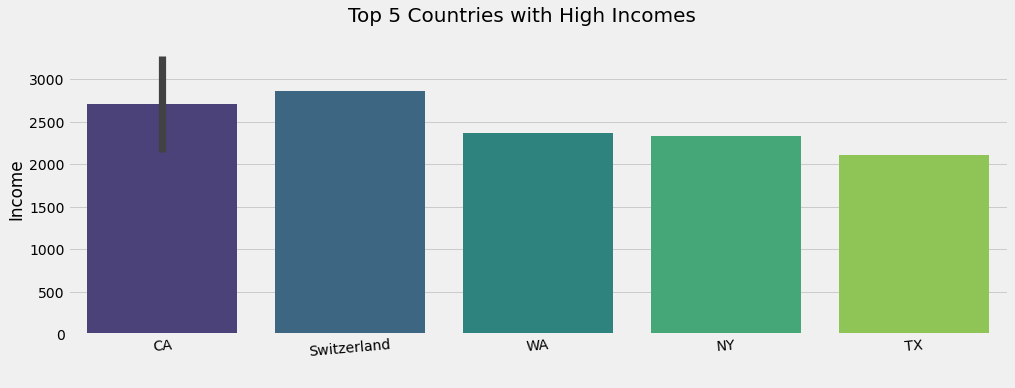

In [287]:

x = data2[['Country','Income']].sort_values(by = 'Income', ascending = False).head(6)
sb.barplot(x['Country'], x['Income'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.suptitle('Top 5 Countries with High Incomes', fontsize = 20)
plt.show()

D:\Software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



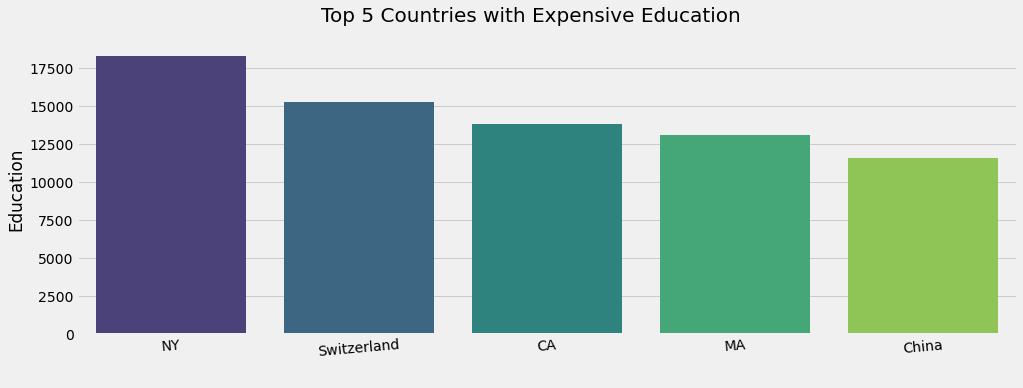

In [289]:
x = data2[['Country','Education']].sort_values(by = 'Education', ascending = False).head(5)
sb.barplot(x['Country'], x['Education'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.suptitle('Top 5 Countries with Expensive Education', fontsize = 20)
plt.show()

D:\Software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



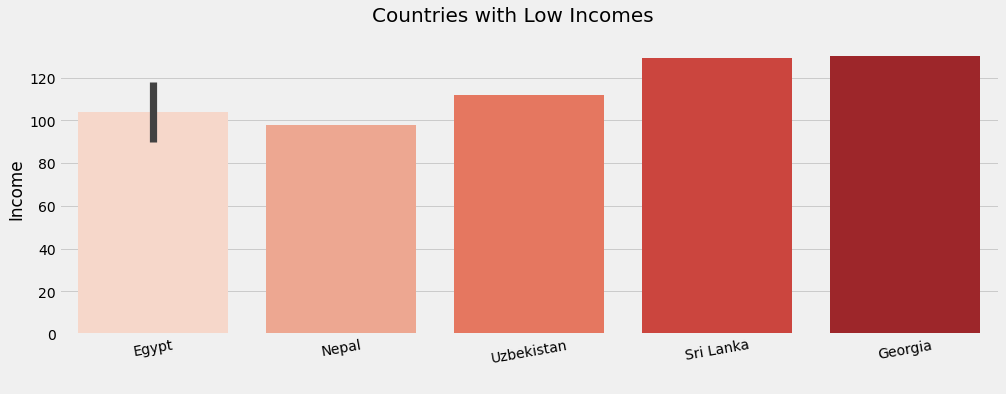

In [291]:
x = data2[['Country','Income']].sort_values(by = 'Income', ascending = True).head(6)
sb.barplot(x['Country'], x['Income'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

plt.suptitle('Countries with Low Incomes', fontsize = 20)
plt.show()

D:\Software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



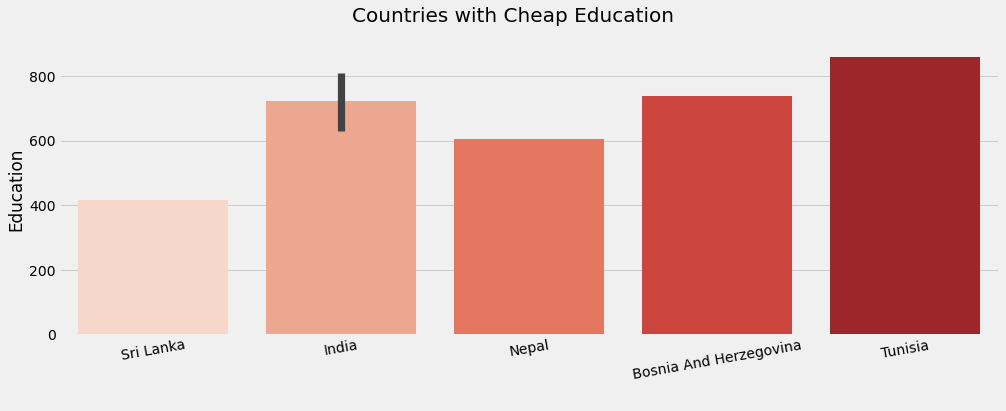

In [292]:
x = data2[['Country','Education']].sort_values(by = 'Education', ascending = True).head(9)
sb.barplot(x['Country'], x['Education'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

plt.suptitle('Countries with Cheap Education', fontsize = 20)
plt.show()

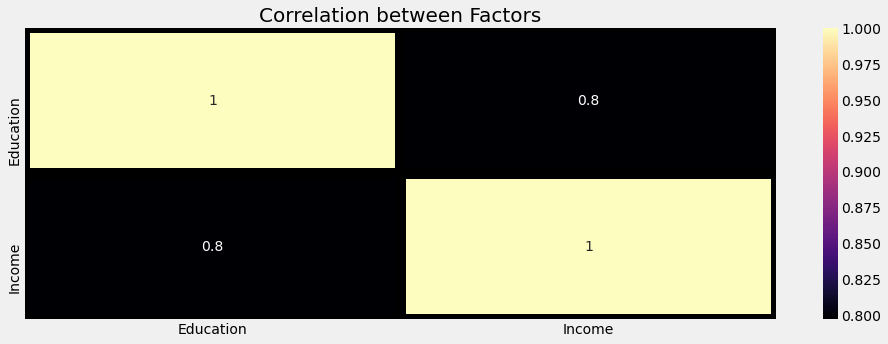

In [295]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sb.heatmap(data2[['Education','Income']].corr(),
            cmap = 'magma', 
            annot = True, linecolor='black', linewidths = 10)
plt.title('Correlation between Factors', fontsize = 20)
plt.show()

#income & education are highly correlated

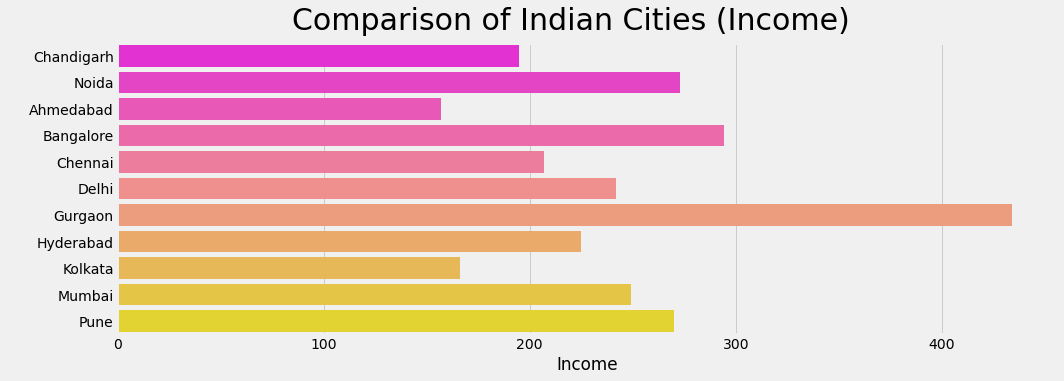

In [315]:
data2['country'].astype(str)
data2['City'] = data2['country']
data2['City'] = data2['City'].apply(lambda x: x[0])

x = data2[data2['Country'] == 'India']
sb.barplot(y = x['City'], x = x['Income'], palette = 'spring')
plt.ylabel(" ")

plt.suptitle('Comparison of Indian Cities (Income)', fontsize = 30)
plt.show()

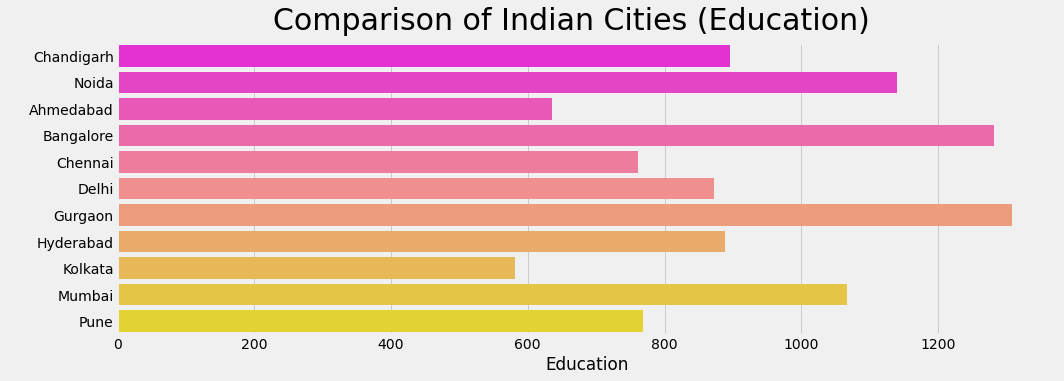

In [314]:
sb.barplot(y = x['City'], x = x['Education'], palette = 'spring')
plt.ylabel(" ")

plt.suptitle('Comparison of Indian Cities (Education)', fontsize = 30)
plt.show()